# ---------------------------------------------------------------------------------------------------------------

                                           🥰 WELCOME DEAR TO "E-REPUTATION" 🥰

# ---------------------------------------------------------------------------------------------------------------

- PLEASE UPLOAD THE DATASET YOU WOULD LIKE TO ANALYSE AND SAVE IT IN THE 'dataset' FILE
- YOUR DATASET MUST CONTAIN A COLUMN NAMED 'Content' REFERRING TO THE TWEET'S CONTENT

# ------------------------------------------ **🥰 Have FUN  🥰**---------------------------------------------

# Libraries

In [1]:
# Imports
import pandas as pd
from datetime import datetime
import re # (Regular Expression):specifies a set of strings that matches it (the functions in this module let you check if a particular string matches a given regular expression)
import nltk # (Natural Language Toolkit): suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. LOAD DATASET

In [2]:
# Read the test data from dataset file 
# Don't forget to change the 'Name' of the CSV file to the one of your file!
test = pd.read_csv('dataset/TEST.csv')
test.head()

,Datetime,Tweet_Id,Content,Language,Username,User_id,User_location
0,2022-10-09 09:54:10+00:00,1579047559770742784,So 365 Days is a bad movie but damn that girl ...,en,stphkt,2329528364,NaN
1,2022-10-08 11:31:12+00:00,1578709591361490944,"not a bad movie as I thought it would be, but ...",en,TheMuhandiss,978271725480808449,UK
2,2022-10-07 23:55:00+00:00,1578534389268434945,#Netflix movie of the day: El Camino: A Breaki...,en,flixboss,969241693206777859,United States
3,2022-10-02 06:00:16+00:00,1576451984009285632,Blonde wasn’t a bad movie on #Netflix but it c...,en,_jonguerra,52530575,"Los Angeles, CA"
4,2022-10-02 05:57:05+00:00,1576451183165984768,Not such a bad movie. I wished it had a little...,en,Triad718,1483120397956653058,"Bronx, NY"


# 2. LOAD MODELS AND TF-IDF VECORIZER

In [3]:
import pickle
# load model Random Forests
with open('./Models/model_RandomForest.pkl', 'rb') as f:
    loaded_model3 = pickle.load(f)

In [4]:
# load the tfidf_vectorizer from the disk
tfidf_vect = pickle.load(open('./Models/tfidfvect.pkl', 'rb'))

# 2. DATA CLEANING and PREPROCESSING

In [5]:
# First, Remove missing values from all the columns of the dataset()
test = test.dropna() 
# Then, We'll reset the dataframe index
test.reset_index(drop= True,inplace=True)

In [6]:
# Drop the duplicates from the dataset
test = test.drop_duplicates()
# Make sure that all the duplicates were removed
test.duplicated().sum()

0

In [7]:
# Remove stopwords
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english')) #stop words: usually refer to the most common words in a language
print('          ----------< Standard stop words list >---------        \n\n',stop_words)

          ----------< Standard stop words list >---------        

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some'

In [8]:
# For sentiment analysis purposes, we should keep the words of negation : 
# 'no', 'nor','not','don',"don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
# "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't", 
# 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
# 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 
# Because if we do so the overall meaning of the sentence might be considered positive while it's neagtive (and vice-versa).
# which is not at all the reality.
# Thus, I'll proceed to the customization of the standard stopwords list 

In [9]:
# Remove the negation words from the stopwords
# Creating a list of the words to keep
not_stopwords = ['no', 'nor','not','don',"don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',\
           "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't",\
           'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",\
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","t"]
print('The Number of Negation words in stopwords list is :',len(not_stopwords))
stop_words = list(stopwords.words('english'))
print('The Number of NLTK standard Stop words is :',len(stop_words))
stop_words = [e for e in stop_words if e not in not_stopwords]
print('The Number of the "customized" Stop words is :',len(stop_words))

The Number of Negation words in stopwords list is : 41
The Number of NLTK standard Stop words is : 179
The Number of the "customized" Stop words is : 138


In [10]:
# Define the cleaning function
def cleanTweets(text):
    corpus = []
    # Convert strings in the Series/Index to lowercase (example I to i)    
    text = text.lower()
    # remove username-tags '@mentions'  
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    ## 're.sub()' is a function used to substitute a given substring with another substring
    # remove hastag '#' symbol
    text = re.sub('#','',text) 
    # remove Retweets (knowing that a message is identified as a retweet by RT-tags) 
    text = re.sub('RT[\s]+','',text)
    # Remove urls
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub(r"www.\s+", '', text)
    # Change 't to 'not'
    text = re.sub(r"\'t", " not", text)
    # Remove punctuation from text (string.punctuation is --> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)    
    text = re.sub('['+string.punctuation+']', '', text)
    # Remove some special characters
    text = re.sub(r'([\;\:\|•«\n])', ' ', text)
    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Lemmetization:
    # this is similar to stemming but it brings context to the words (it links words with similar meanings to one word)
    text = nltk.word_tokenize(text) 
    for y in text :
           if y not in stop_words :
            corpus.append(lemmatizer.lemmatize(y))
    text = ' '.join(corpus)
    return text

In [11]:
# Apply cleanTweet function to the test dataset
test['cleaned_review'] = test['Content'].apply(cleanTweets)

# 3. SENTIMENT ANALYSIS BY OUR BUILT MODEL

In [12]:
# Vectorization
tf_test= tfidf_vect.transform(test['cleaned_review'])
# RandomForest
print("\n- Sentiment analysis of Netflix REVIEWS:\n")
print(loaded_model3.predict(tf_test))
test['Sentiment'] = loaded_model3.predict(tf_test)
display(test)


- Sentiment analysis of Netflix REVIEWS:

['Positive' 'Negative' 'Negative' ... 'Negative' 'Positive' 'Positive']


,Datetime,Tweet_Id,Content,Language,Username,User_id,User_location,cleaned_review,Sentiment
0,2022-10-08 11:31:12+00:00,1578709591361490944,"not a bad movie as I thought it would be, but ...",en,TheMuhandiss,978271725480808449,UK,not bad movie thought would not impressive goo...,Positive
1,2022-10-07 23:55:00+00:00,1578534389268434945,#Netflix movie of the day: El Camino: A Breaki...,en,flixboss,969241693206777859,United States,netflix movie day el camino breaking bad movie...,Negative
2,2022-10-02 06:00:16+00:00,1576451984009285632,Blonde wasn’t a bad movie on #Netflix but it c...,en,_jonguerra,52530575,"Los Angeles, CA",blonde wasn ’ t bad movie netflix could longer,Negative
3,2022-10-02 05:57:05+00:00,1576451183165984768,Not such a bad movie. I wished it had a little...,en,Triad718,1483120397956653058,"Bronx, NY",not bad movie wished little punch umma definit...,Positive
4,2022-09-20 23:42:00+00:00,1572370522473627649,#Netflix movie of the day: El Camino: A Breaki...,en,FlixbossCA,970656598598307840,Canada,netflix movie day el camino breaking bad movie...,Negative
...,...,...,...,...,...,...,...,...,...
30272,2012-10-12 04:13:20+00:00,256608465814962176,"@HiHeatherrr_24 Omigod :) it's such a ""feel go...",en,jordanmarieroth,454218629,"Washington, DC",omigod feel good movie love bestfriendtelepoth...,Positive
30273,2012-10-12 03:09:32+00:00,256592409343963137,Good action movie. RT @dangadanga: Ms_43938 @D...,en,Ms_43938,278682662,In front of a tv #MovieAddict,good action movie rt ms43938 act valor deck ne...,Positive
30274,2012-10-12 02:23:55+00:00,256580928875401216,"I'd forgotten how good a movie ""In the Line of...",en,paul_wb_wtf,152001446,"Vancouver, Canada",id forgotten good movie line fire netflix nhll...,Negative
30275,2012-10-12 02:19:24+00:00,256579795478003712,Machine Gun Preacher #Netflix definitely an in...,en,Falconyx85,193464274,"West Virginia, USA",machine gun preacher netflix definitely intere...,Positive


In [13]:
# get the percentage of positive,negative and neutral tweets
def sentiment_percentage (data,df):
    # Positive tweets
    test_pos = data[df=='Positive']
    test_pos = test_pos['cleaned_review']
    percentage_pos = round((test_pos.shape[0]/data.shape[0]) *100,1)
    # Negative tweets
    test_neg = data[df=='Negative']
    test_neg = test_neg['cleaned_review']
    percentage_neg = round((test_neg.shape[0]/data.shape[0]) *100,1)
    # Neutral tweets
    test_neut = data[df=='Neutral']
    test_neut = test_neut['cleaned_review']
    percentage_neut = round((test_neut.shape[0]/data.shape[0]) *100,1)
    return percentage_pos,percentage_neg,percentage_neut

In [14]:
# Print the sentiment analysis percentages
pos_perc,neg_perc,neut_perc = sentiment_percentage(test,test['Sentiment'])

print("Percentage of  Netflix REVIEW's sentiment analysis :\n")
print('- Positive tweets ---> {0}% '.format(pos_perc))
print('- Negative tweets ---> {0}%'.format(neg_perc))
print('- Neutral tweets  ---> {0}%'.format(neut_perc))

Percentage of  Netflix REVIEW's sentiment analysis :

- Positive tweets ---> 89.1% 
- Negative tweets ---> 10.6%
- Neutral tweets  ---> 0.3%


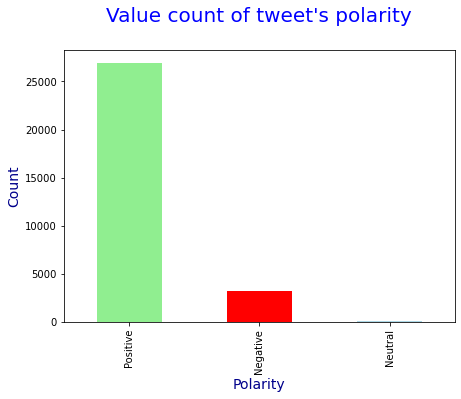

In [15]:
#plot a bar graph to show count of tweet sentiment
def plot_bar (data):
    fig = plt.figure(figsize=(7,5))
    color = ['lightgreen','red','lightblue']
    data.value_counts().plot(kind='bar',color = color)
    plt.title("Value count of tweet's polarity\n",size='20',color='blue')
    plt.ylabel('Count',size='14',color='darkblue')
    plt.xlabel('Polarity',size='14',color='darkblue')
    plt.grid(False)
    plt.show()

plot_bar(test['Sentiment'])

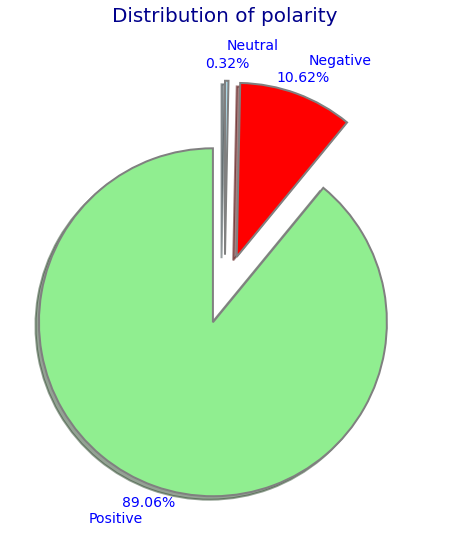

In [16]:
#pie chart to show percentage distribution of polarity
def plot_pie(data):
    fig = plt.figure(figsize=(8,8))
    colors = ('lightgreen','red','lightblue')
    wp={'linewidth':2, 'edgecolor': 'grey'}
    tags=data.value_counts()
    explode = (0.2,0.2,0.2)
    tags.plot(kind='pie', autopct='%1.2f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='',textprops = dict(color ="blue",fontsize = 14),pctdistance=1.1, labeldistance=1.2)
    plt.title('Distribution of polarity\n\n',size='20', color= 'darkblue')
    plt.show()

plot_pie(test['Sentiment'])

## WORDCLOUD OF TEXTBLOB SENTIMENT ANALYZER

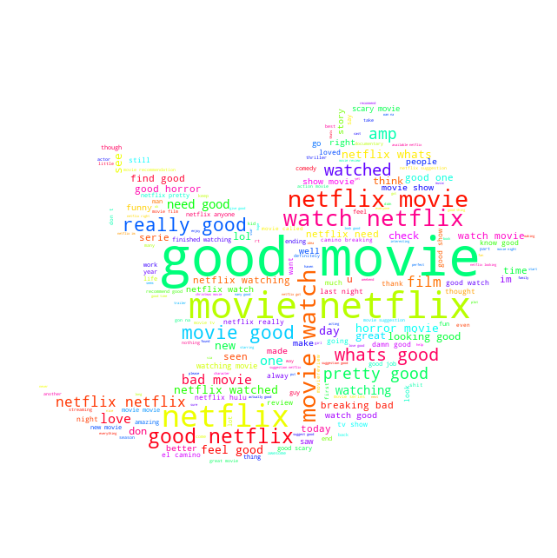

In [17]:
#create a function for wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Import twitter image to np.array
mask = np.array(Image.open('Images/twitter.jpg'))

def create_wordcloud(text,name):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', colormap = 'hsv', width=2800, height=1000, random_state=21, max_font_size=130, mask=mask).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    # Save the image in the Images folder:
    plt.savefig(name,format="png")
    plt.show()

    
#plot wordcloud for all tweets
word_t = test['cleaned_review']
create_wordcloud(word_t,"Images/all_testreviews_words.png")

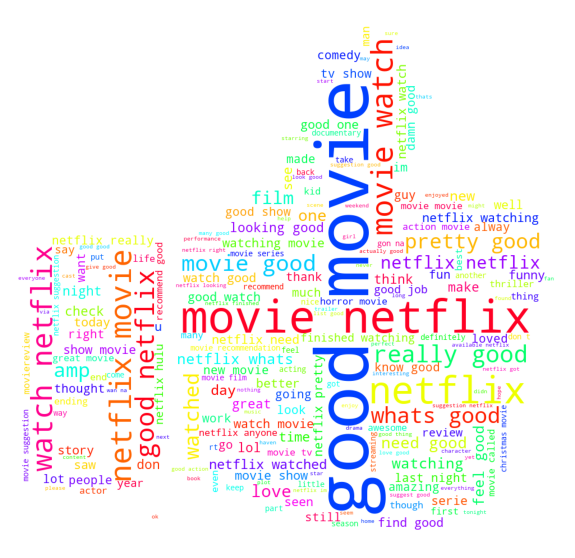

In [18]:
#create wordcloud for positive tweets
posi_test = test.loc[test['Sentiment']=='Positive', 'cleaned_review']
# Import positive image to np.array
mask = np.array(Image.open('./Images/positive.jpg'))
create_wordcloud(posi_test,"Images/Positive_testreviews_words.png")

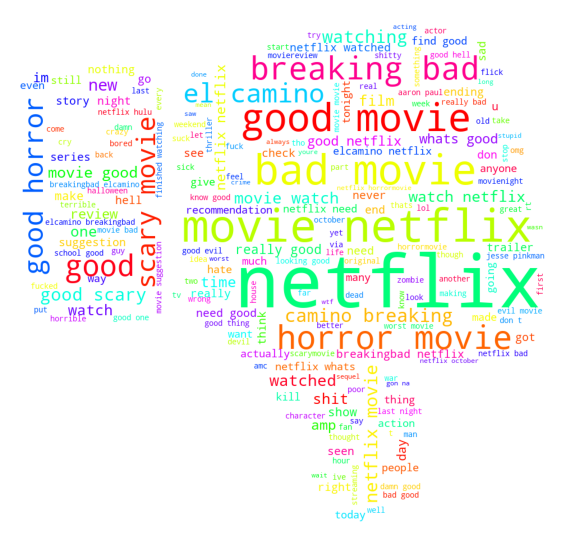

In [19]:
#plot wordcloud for negative tweets
neg_test = test.loc[test['Sentiment']=='Negative', 'cleaned_review']
# Import negative image to np.array
mask = np.array(Image.open('./Images/negative.jpg'))
create_wordcloud(neg_test,"Images/Negative_testreviews_words.png")

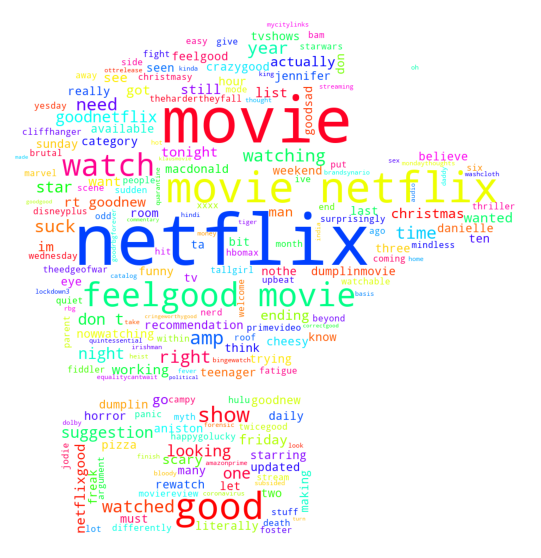

In [20]:
#plot wordcloud for neutral tweets
neut_test = test.loc[test['Sentiment']=='Neutral', 'cleaned_review']
# Import negative image to np.array
mask = np.array(Image.open('./Images/Neutral.jpg'))
create_wordcloud(neut_test,"Images/Neutral_testreviews_words.png")

In [21]:
# Save the analyzed data as a CSV file
# Feel free to change the 'Name' of the CSV file to the one you prefer
test.to_csv('dataset/Sentiment-Analyzed_Test.csv', sep=',', index=False)

# ---------------- **🥰 THANK YOU FOR TRYING OUR SOLUTION 🥰**-----------------